In [23]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run 1.Dublin_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math
import copy
%store -r random_numbers_matrix

In [24]:
def LR(x):
    return np.exp(-x/100)*0.01+0.00001

In [25]:
Y_updated = np.delete(Y,random_numbers_matrix[0].flatten().astype(int), axis=0)
connections = Y[random_numbers_matrix[0].flatten().astype(int), 0]

alpha_array = [0,1,2,3,4]
dim_array = [2,4,8,10,12,16,20,24]
Accuracy_dim_alpha = np.zeros((len(alpha_array),len(dim_array)))

n = 10000000
num_samples = 410 

In [47]:
l = 0
for dim in dim_array:
    mu = np.zeros(dim)
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    True_posetiv = np.zeros(len(alpha_array))
    True_negativ = np.zeros(len(alpha_array))
    False_posetiv = np.zeros(len(alpha_array))
    False_negativ = np.zeros(len(alpha_array))
    
    a = 0
    for alpha in alpha_array:
        prev_grad = 200
        grad = 0
        points_copy = copy.deepcopy(points)
        grad_sum = np.zeros(n) # Define the gradient sum
        k = 0

        while abs(prev_grad - grad) > 0.1: # stopping criteria
            print(prev_grad - grad)
            prev_grad = grad
            for i in range(1,num_samples+1): # Run over number of num_samples
                grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
                grad_sum[k] += np.sum((grad_now)**2)
                points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
            grad = grad_sum[k]
            k += 1

        point_a = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),1]]
        point_b = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),2]]
        points_a_np = np.array(point_a)
        points_b_np = np.array(point_b)

        distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
        sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

        True_posetiv[a] = np.sum(connections*sigmoid_value >= 0.5)
        False_posetiv[a] = np.sum(connections*sigmoid_value <= -0.5)
        True_negativ[a] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
        False_negativ[a] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))

        a += 1

    Accuracy_dim_alpha[:,l] = (True_posetiv+True_negativ)/(len(sigmoid_value))
    print(Accuracy_dim_alpha)
    
    l += 1

200
-320366.2134143162
183994.74375301562
35365.05319279128
19966.697861433553
11599.0869266425
6115.782736679015
2975.4014829851585
1934.7297407271108
2410.986679317626
3182.579494661797
3541.766597326743
3463.902839833725
3056.5239837368863
2701.532107778803
2605.079208817486
2620.0592638668604
2537.7704857816243
2275.3443892746327
1916.5246322515923
1584.547415963374
1353.9143543909631
1248.6249407156029
1240.1652828203987
1273.7114511513246
1310.5954279264733
1331.6167695763834
1320.0519227355762
1263.965950355343
1164.1450719390778
1033.5453278933292
891.7355693918089
757.6176454271372
643.7906589796585
554.5796408758615
488.24017314620323
440.45887170427704
406.1108256739062
380.5717526195622
361.7232287239767
350.85470219861054
350.26905645756415
358.5379167255005
368.24478399443706
369.7120210583944
357.76949812225484
334.5281521558172
306.17932619803105
278.43677554176793
254.34406681123346
234.43072958834637
217.81521275242085
203.26580593800554
189.84011742262828
177.0784716

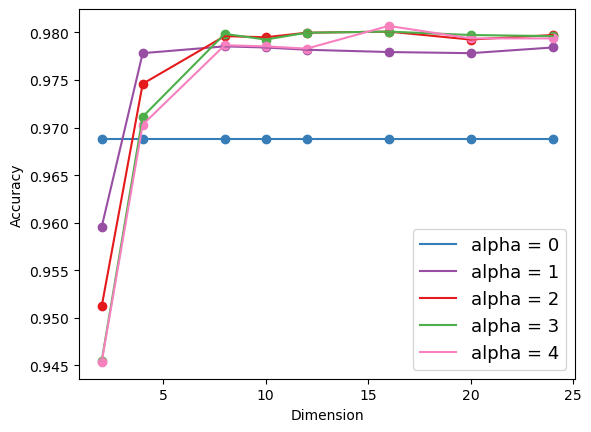

In [49]:
plt.plot(dim_array, Accuracy_dim_alpha[0], label='alpha = 0', color = '#377eb8')
plt.plot(dim_array, Accuracy_dim_alpha[1], label='alpha = 1', color = '#984ea3')
plt.plot(dim_array, Accuracy_dim_alpha[2], label='alpha = 2', color = '#e41a1c')
plt.plot(dim_array, Accuracy_dim_alpha[3], label='alpha = 3', color = '#4daf4a')
plt.plot(dim_array, Accuracy_dim_alpha[4], label='alpha = 4', color = '#f781bf')
plt.scatter(dim_array, Accuracy_dim_alpha[0], facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(dim_array, Accuracy_dim_alpha[1], facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(dim_array, Accuracy_dim_alpha[2], facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(dim_array, Accuracy_dim_alpha[3], facecolors='#4daf4a', edgecolors='#4daf4a')
plt.scatter(dim_array, Accuracy_dim_alpha[4], facecolors='#f781bf', edgecolors='#f781bf')
plt.ylabel('Accuracy')
plt.xlabel('Dimension')
plt.legend(fontsize=13)
plt.show()